## Ingeniería de variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
def plot_percent_cols(df, li=25, lm=50, ls=75):
    # Calcular los porcentajes de datos nulos y no nulos
    null_percent = df.isnull().mean() * 100
    not_null_percent = 100 - null_percent

    # Crear la figura y el eje con un tamaño específico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Crear el gráfico de barras acumulado
    ax.bar(df.columns, not_null_percent, label='Not Null')
    ax.bar(df.columns, null_percent, bottom=not_null_percent, label='Null')

    # Agregar las líneas horizontales
    ax.axhline(li, color='r', linestyle='--')
    ax.axhline(lm, color='g', linestyle='--')
    ax.axhline(ls, color='b', linestyle='--')

    # Agregar la leyenda
    ax.legend()

    # Agregar títulos
    plt.title('Porcentaje de datos nulos y no nulos por columna')

    # Mostrar el gráfico
    plt.xticks(rotation=90)
    plt.show()

### 1. Leer los datos

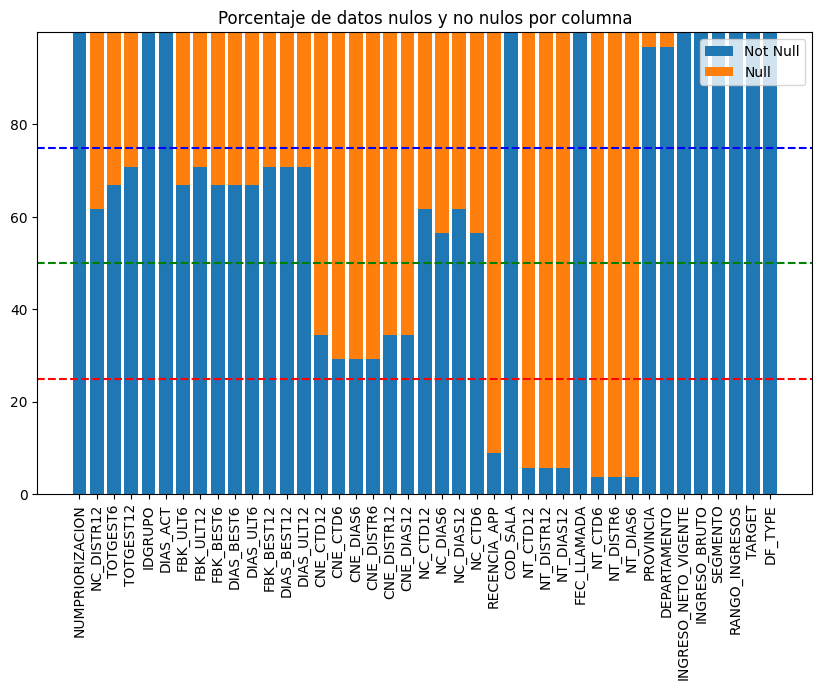

In [3]:
df = pd.read_parquet('./data/1_data_exploracion_datos.parquet')
plot_percent_cols(df)

### 2. Limpieza general de datos

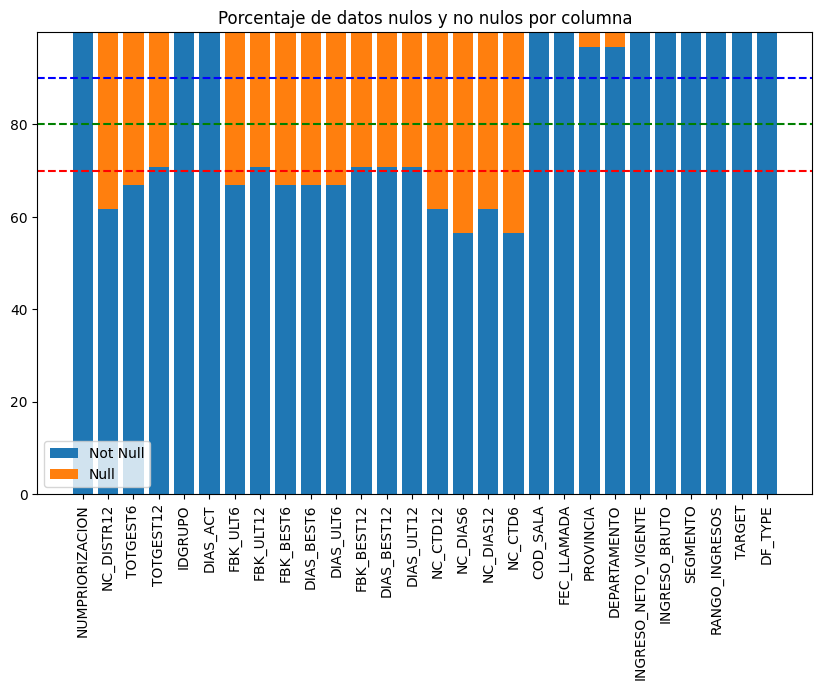

In [4]:
# Eliminar las columnas con más del 50% de datos nulos
df = df.dropna(thresh=df.shape[0]*0.5, axis=1)
plot_percent_cols(df, li=70, lm=80, ls=90)

### 3. Limpieza y tratamiento de datos categóricos

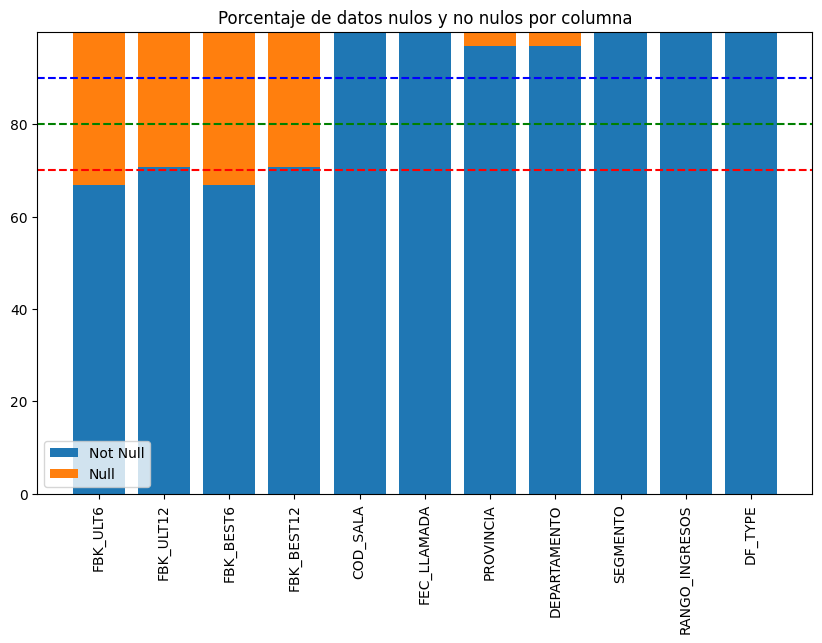

In [5]:
# Seleccionar las columnas con datos categoricos
df_cat = df.select_dtypes(include=['object'])
plot_percent_cols(df_cat, li=70, lm=80, ls=90)

In [6]:
# Reducir a 2 categorias la columna DEPARTAMENTO
df_cat['DEPARTAMENTO'] = df_cat['DEPARTAMENTO'].apply(lambda x: 'FUERA DE LIMA' if x != 'LIMA' else x)
print(df_cat['DEPARTAMENTO'].value_counts(dropna=False, normalize=True))

DEPARTAMENTO
LIMA             0.591556
FUERA DE LIMA    0.408444
Name: proportion, dtype: float64


In [7]:
# Eliminar la columna PROVINCIA, FEC_LLAMADA y DF_TYPE
df_cat = df_cat.drop(columns=['PROVINCIA'])
print('Eliminando la columna PROVINCIA')

df_cat = df_cat.drop(columns=['DF_TYPE'])
print('Eliminando la columna DF_TYPE')

df_cat = df_cat.drop(columns=['FEC_LLAMADA'])
print('Eliminando la columna FEC_LLAMADA')

Eliminando la columna PROVINCIA
Eliminando la columna DF_TYPE
Eliminando la columna FEC_LLAMADA


In [8]:
# Crear categoría "SIN DATOS" para FBK_ULT6, FBK_ULT12, FBK_BEST6, FBK_BEST12
df_cat['FBK_ULT6'] = df_cat['FBK_ULT6'].fillna('SIN DATOS')
df_cat['FBK_ULT12'] = df_cat['FBK_ULT12'].fillna('SIN DATOS')
df_cat['FBK_BEST6'] = df_cat['FBK_BEST6'].fillna('SIN DATOS')
df_cat['FBK_BEST12'] = df_cat['FBK_BEST12'].fillna('SIN DATOS')

In [10]:
# Imputar moda para la columna COD_SALA con datos nulos
df_cat['COD_SALA'] = df_cat['COD_SALA'].fillna(df_cat['COD_SALA'].mode()[0])
print(df_cat['COD_SALA'].value_counts(dropna=False, normalize=True))

COD_SALA
NC     0.305764
EC     0.165888
C      0.110371
PP     0.110255
CD     0.089365
PA     0.060782
CON    0.042606
IL     0.037769
UPG    0.027446
PRR    0.023040
2DA    0.020500
DIL    0.003780
BPE    0.002407
DEF    0.000024
TC     0.000004
Name: proportion, dtype: float64


In [14]:
# Imputar moda para la columna SEGMENTO con datos nulos
df_cat['SEGMENTO'] = df_cat['SEGMENTO'].fillna(df_cat['SEGMENTO'].mode()[0])
print(df_cat['SEGMENTO'].value_counts(dropna=False, normalize=True))

SEGMENTO
3      0.413921
2      0.262877
1BC    0.147100
1A     0.101020
4      0.063017
5      0.009307
6      0.002759
Name: proportion, dtype: float64


In [16]:
# Imputar moda para la columna RANGO_INGRESOS con datos nulos
df_cat['RANGO_INGRESOS'] = df_cat['RANGO_INGRESOS'].fillna(df_cat['RANGO_INGRESOS'].mode()[0])
print(df_cat['RANGO_INGRESOS'].value_counts(dropna=False, normalize=True))

RANGO_INGRESOS
Entre S/.1000-4000     0.555416
Entre S/.4000-10000    0.352411
Mayor a S/.10000       0.081359
Entre S/.600-1000      0.007701
Sin ingresos           0.002983
Entre S/.0-600         0.000129
Name: proportion, dtype: float64


<Axes: >

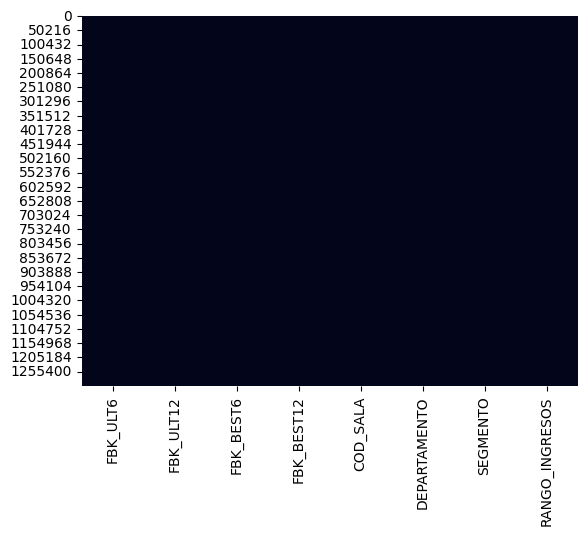

In [17]:
sns.heatmap(df_cat.isnull(), cbar=False)

#### 4. Limpieza y tratamiendo de datos numéricos